# Analisis exploratorio de los Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [2]:
# Defino los paths de los archivos Excel
pipomessage_path = "tecnica_diego/obscure_pipomessage.xlsx"
user_path = "tecnica_diego/obscure_user.xlsx"
usermessage_path = "tecnica_diego/usermessage.xlsx"
symptoms_path = "tecnica_diego/obscure_symptoms.xlsx"

# Cargar los datos en pandas DataFrames
pipomessage_df = pd.read_excel(pipomessage_path)
user_df = pd.read_excel(user_path)
usermessage_df = pd.read_excel(usermessage_path)
symptoms_df = pd.read_excel(symptoms_path)

# Visualizar las primeras filas
pipomessage_df.head(), user_df.head(), usermessage_df.head(), symptoms_df.head()

(       id         patient                     creation_date body
 0  451982    883235090316  2023-06-02 13:31:51.360583+00:00    🌟
 1  490282  88674443816618  2023-06-12 13:08:50.123950+00:00  NaN
 2  490342   9932553318483  2023-06-12 13:15:18.707841+00:00  NaN
 3  490363  93349729602360  2023-06-12 13:17:03.154183+00:00  NaN
 4  490368  88664675181129  2023-06-12 13:17:28.927168+00:00  NaN,
      phone_number                     creation_date     cancer_type
 0    883888159324         2022-10-17 14:12:55+00:00             NaN
 1    883801795941  2023-01-31 13:08:09.590326+00:00  Cáncer de mama
 2    882996887778  2023-01-31 13:30:22.994697+00:00             NaN
 3    882872325922  2023-02-14 16:03:56.272810+00:00             NaN
 4  93349800196016         2022-11-21 14:28:46+00:00             NaN,
        id       patient                     creation_date  \
 0  142022  8.834444e+11  2023-03-23 14:55:52.409996+00:00   
 1    1657  8.826746e+11  2023-01-13 13:38:24.867173+00:00   
 2

### En este análisis, trataré de responder las siguientes preguntas:

1. ¿Cuántos usuarios únicos hay en los datos y cuántos mensajes han enviado?
2. ¿Cuántos mensajes ha enviado el chatbot a los usuarios?
3. ¿Cuántos tipos únicos de cáncer se han registrado en los datos?
4. ¿Cuántos síntomas únicos se han registrado en los datos y cuál es su 
    distribución de intensidad?
5. ¿Cuál es la distribución temporal de los mensajes y los registros de síntomas?

In [3]:
# Cuantos usuarios unicos hay en los datos
num_unique_users = usermessage_df['patient'].nunique()
# Total de mensajes enviados
num_user_messages = usermessage_df.shape[0]

num_unique_users, num_user_messages

(2600, 249027)

Hay 2,600 usuarios únicos en los datos y han enviado un total de 249,027 mensajes.

In [4]:
# Cantidad de mensajes enviados por Pipo
num_bot_messages = pipomessage_df.shape[0]
num_bot_messages

126120

El chatbot ha enviado un total de 126,120 mensajes a los usuarios.

In [5]:
# Count the number of unique cancer types
num_unique_cancer_types = user_df['cancer_type'].nunique()
num_unique_cancer_types

523

Hay 523 tipos únicos de cáncer registrados en los datos.

In [6]:
# Numero de sintomas unicos
num_unique_symptoms = symptoms_df['description'].nunique()

# Obtenemos la distribución de intensidad
symptom_intensity_distribution = symptoms_df['intensity'].value_counts().sort_index()


num_unique_symptoms

2049

In [7]:
from tabulate import tabulate

# Datos de ejemplo
col1 = symptom_intensity_distribution[:].index.to_numpy(dtype=int)
col2 = symptom_intensity_distribution.values
table = np.column_stack((col1, col2))
# Imprimir la tabla
tabla = tabulate(table, headers=["Intensidad", "Distribución"], tablefmt="fancy_grid")
print(tabla)


╒══════════════╤════════════════╕
│   Intensidad │   Distribución │
╞══════════════╪════════════════╡
│            0 │             19 │
├──────────────┼────────────────┤
│            1 │             80 │
├──────────────┼────────────────┤
│            2 │            355 │
├──────────────┼────────────────┤
│            3 │            527 │
├──────────────┼────────────────┤
│            4 │            461 │
├──────────────┼────────────────┤
│            5 │            652 │
├──────────────┼────────────────┤
│            6 │            483 │
├──────────────┼────────────────┤
│            7 │            523 │
├──────────────┼────────────────┤
│            8 │            617 │
├──────────────┼────────────────┤
│            9 │            294 │
├──────────────┼────────────────┤
│           10 │            276 │
├──────────────┼────────────────┤
│           11 │              5 │
├──────────────┼────────────────┤
│           12 │              1 │
├──────────────┼────────────────┤
│           13

In [8]:
# Convertimos la columna creation_date a datetime format
pipomessage_df['creation_date'] = pd.to_datetime(pipomessage_df['creation_date'], format='mixed')
usermessage_df['creation_date'] = pd.to_datetime(usermessage_df['creation_date'], format='mixed')
symptoms_df['creation_date'] = pd.to_datetime(symptoms_df['creation_date'], format='mixed')


# Creamos las columna date donde se guardara el dia de la fecha
pipomessage_df['date'] = pipomessage_df['creation_date'].dt.date
usermessage_df['date'] = usermessage_df['creation_date'].dt.date
symptoms_df['date'] = symptoms_df['creation_date'].dt.date

# Count the number of messages and symptom records by date
bot_message_count_by_date = pipomessage_df['date'].value_counts().sort_index()
user_message_count_by_date = usermessage_df['date'].value_counts().sort_index()
symptom_count_by_date = symptoms_df['date'].value_counts().sort_index()

bot_message_count_by_date, user_message_count_by_date, symptom_count_by_date

(date
 2023-06-01    4325
 2023-06-02    4083
 2023-06-03    3822
 2023-06-04    3802
 2023-06-05    3650
 2023-06-06    3467
 2023-06-07    3254
 2023-06-08    3696
 2023-06-09    4331
 2023-06-10    4301
 2023-06-11    4382
 2023-06-12    4035
 2023-06-13    3388
 2023-06-14    3509
 2023-06-15    4430
 2023-06-16    3173
 2023-06-17    3584
 2023-06-18    3207
 2023-06-19    3840
 2023-06-20    4272
 2023-06-21    3587
 2023-06-22    4432
 2023-06-23    4229
 2023-06-24    3652
 2023-06-25    3630
 2023-06-26    3951
 2023-06-27    3318
 2023-06-28    3790
 2023-06-29    3649
 2023-06-30    3552
 2023-07-01    3472
 2023-07-02    3381
 2023-07-03    4342
 2023-07-04     584
 Name: count, dtype: int64,
 date
 2022-03-25       2
 2022-03-29       3
 2022-03-30      17
 2022-04-04       3
 2022-04-11      10
               ... 
 2023-06-30    1085
 2023-07-01    1102
 2023-07-02     805
 2023-07-03    1145
 2023-07-04     183
 Name: count, Length: 426, dtype: int64,
 date
 2022-06-13  

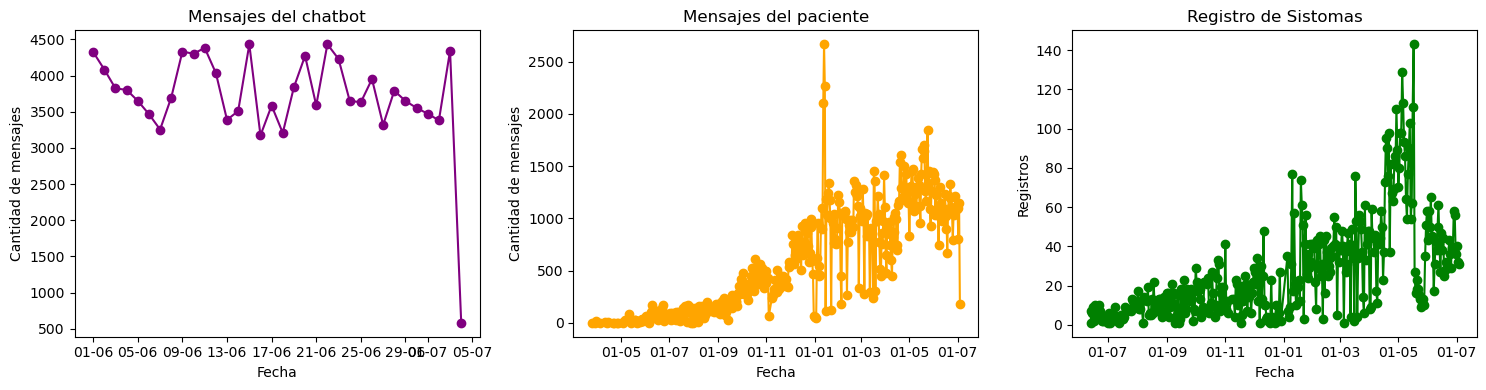

In [9]:
# Crear una figura y dos subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Graficar Mensajes de PIPO
bot_message_count_by_date.plot(ax=ax1, kind='line', marker='o', color='purple')

ax1.set_title('Mensajes del chatbot')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cantidad de mensajes')

# Graficar Mensajes del PACIENTE
user_message_count_by_date.plot(ax=ax2, kind='line', marker='o', color='orange')

ax2.set_title('Mensajes del paciente')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Cantidad de mensajes')

# Graficar Registro de Sistomas
symptom_count_by_date.plot(ax=ax3, kind='line', marker='o',color='green')

ax3.set_title('Registro de Sistomas')
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Registros')

# Ajustar las etiquetas del eje x
date_format = mdates.DateFormatter('%d-%m')
ax1.xaxis.set_major_formatter(date_format)
ax2.xaxis.set_major_formatter(date_format)
ax3.xaxis.set_major_formatter(date_format)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

1. Mensajes del chatbot: los mensajes enviados por el chatbot se distribuyen desde el 1 de junio de 2023 hasta el 4 de julio de 2023, con un rango de 584 a 4432 mensajes por día.

2. Mensajes de los usuarios: los mensajes enviados por los usuarios se distribuyen desde el 25 de marzo de 2022 hasta el 4 de julio de 2023, con un rango de 2 a 1837 mensajes por día.

3. Registros de síntomas: los registros de síntomas se distribuyen desde el 13 de junio de 2022 hasta el 3 de julio de 2023, con un rango de 1 a 73 registros por día.